# uvlf-hod: Complete Tutorial

This notebook provides a comprehensive introduction to the `uvlf-hod` package using the unified model architecture.

**What you'll learn:**
1. Creating a unified `HODModel`
2. Computing UV luminosity functions
3. Calculating galaxy bias
4. Exploring UV-halo mass relations
5. Working with occupation distributions
6. Parameter exploration and updates

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uvlf_hod import HODModel, UVHMRModel

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 100
%matplotlib inline

print("✓ Imports successful!")

✓ Imports successful!


## Part 1: Creating Your First Model

The `HODModel` is a unified class that combines:
- **UV-Halo Mass Relation (UVHMR)**: Connects halo mass to UV luminosity
- **Halo Occupation Distribution (HOD)**: Models galaxy populations in halos

In [2]:
# Create a complete model with all parameters
model = HODModel(
    z=6.0,           # Redshift
    eps0=0.1,        # Star formation efficiency
    Mc=10**11.5,     # Characteristic halo mass [M_sun]
    a=0.6,           # Low-mass slope
    b=0.35,          # High-mass slope
    sigma_UV=0.35,   # UV magnitude scatter [mag]
    Mcut=10**10,     # Satellite cutoff mass [M_sun]
    Msat=10**12.5,   # Satellite normalization [M_sun]
    asat=1.0,        # Satellite power-law slope
    add_dust=True    # Include dust attenuation
)

print(model)

HOD Model at z=6.0
UVHMR Parameters:
  eps0 = 0.100
  Mc = 3.16e+11 M_sun
  a = 0.60
  b = 0.35

HOD Parameters:
  sigma_UV = 0.35 mag
  Mcut = 1.00e+10 M_sun
  Msat = 3.16e+12 M_sun
  asat = 1.00

Settings:
  add_dust = True


## Part 2: UV Luminosity Function

The luminosity function $\Phi(M_{UV})$ tells us the number density of galaxies as a function of UV magnitude.

In [33]:
# Define magnitude range
MUV = np.linspace(-24, -16, 25)

# Compute luminosity function
print("Computing luminosity function...")
phi = model.luminosity_function(MUV)

print(f"✓ Done!")
print(f"  Magnitude range: {MUV.min():.1f} to {MUV.max():.1f}")
print(f"  Φ range: {phi.min():.2e} to {phi.max():.2e} Mpc^-3 mag^-1")

Computing luminosity function...
✓ Done!
  Magnitude range: -24.0 to -16.0
  Φ range: 3.36e-11 to 1.81e-02 Mpc^-3 mag^-1


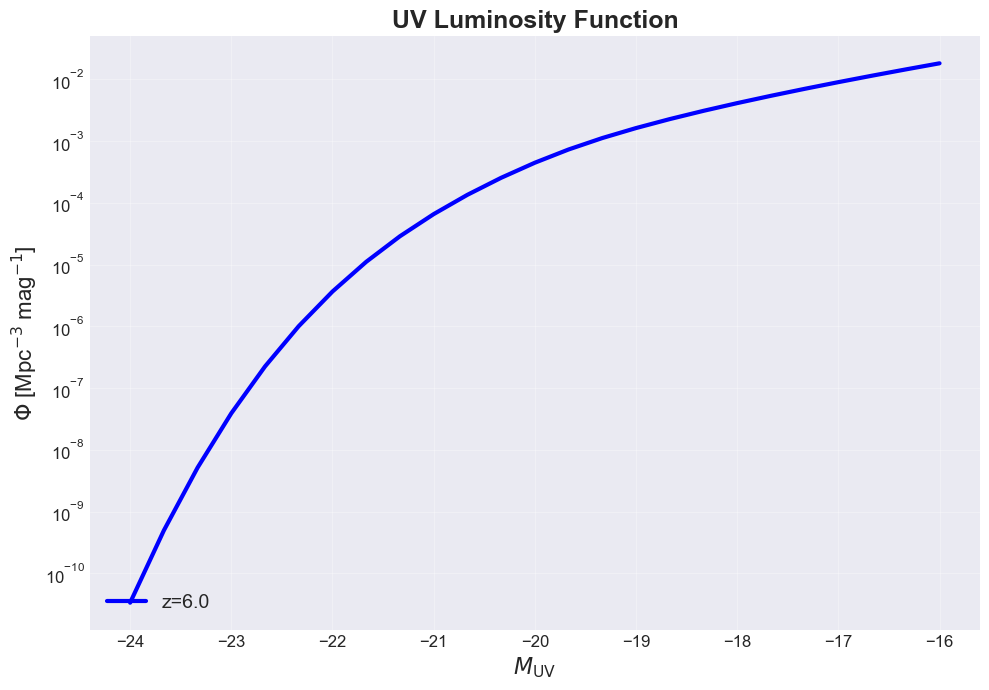

In [34]:
# Plot the luminosity function
fig, ax = plt.subplots(figsize=(10, 7))

ax.semilogy(MUV, phi, 'b-', linewidth=3, label=f'z={model.z}')
ax.set_xlabel('$M_{\\mathrm{UV}}$', fontsize=16)
ax.set_ylabel('$\\Phi$ [Mpc$^{-3}$ mag$^{-1}$]', fontsize=16)
ax.set_title('UV Luminosity Function', fontsize=18, fontweight='bold')
ax.legend(fontsize=14, loc='lower left')
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

## Part 3: Galaxy Bias

Galaxy bias $b_g$ quantifies how strongly galaxies cluster compared to the underlying dark matter.

In [35]:
# Compute galaxy bias
print("Computing galaxy bias...")
bias = model.galaxy_bias(MUV)

print(f"✓ Done!")
print(f"  Bias range: {bias.min():.2f} to {bias.max():.2f}")
print(f"\nInterpretation:")
print(f"  Bright galaxies (M_UV ~ {MUV.min():.1f}): b_g ~ {bias[0]:.2f} (strongly biased)")
print(f"  Faint galaxies (M_UV ~ {MUV.max():.1f}): b_g ~ {bias[-1]:.2f} (weakly biased)")

Computing galaxy bias...
✓ Done!
  Bias range: 3.18 to 22.00

Interpretation:
  Bright galaxies (M_UV ~ -24.0): b_g ~ 22.00 (strongly biased)
  Faint galaxies (M_UV ~ -16.0): b_g ~ 3.18 (weakly biased)


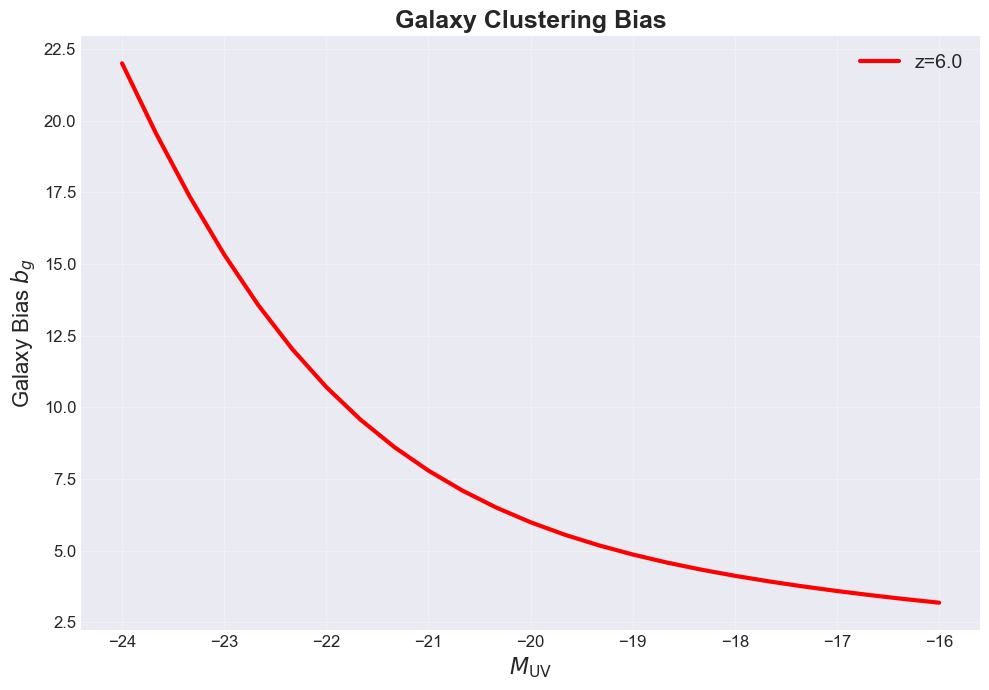

In [36]:
# Plot galaxy bias
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(MUV, bias, 'r-', linewidth=3, label=f'z={model.z}')
ax.set_xlabel('$M_{\\mathrm{UV}}$', fontsize=16)
ax.set_ylabel('Galaxy Bias $b_g$', fontsize=16)
ax.set_title('Galaxy Clustering Bias', fontsize=18, fontweight='bold')
ax.legend(fontsize=14)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

## Part 4: UV-Halo Mass Relation (UVHMR)

The `HODModel` inherits all UVHMR methods from the base class. Let's explore the relationship between halo mass and UV luminosity.

In [37]:
# Explore UVHMR for a single halo
Mh_example = 1e11  # M_sun

# Compute properties
sfr = model.sfr(Mh_example)
MUV_example = model.MUV(Mh_example)
epsilon = model.star_formation_efficiency(Mh_example)

print(f"Halo mass: {Mh_example:.2e} M_sun")
print(f"  Star formation rate: {sfr} M_sun/yr")
print(f"  UV magnitude: {MUV_example}")
print(f"  SFE: {epsilon}")

# Inverse: recover halo mass from UV magnitude
Mh_recovered = model.Mhalo(MUV_example)
print(f"\nInverse check:")
print(f"  M_UV = {MUV_example} → M_h = {Mh_recovered} M_sun")
print(f"  Match: {np.isclose(Mh_example, Mh_recovered)}")

Halo mass: 1.00e+11 M_sun
  Star formation rate: [3.38490365] M_sun/yr
  UV magnitude: [-19.09728267]
  SFE: [0.07508617]

Inverse check:
  M_UV = [-19.09728267] → M_h = [1.04079422e+11] M_sun
  Match: [False]


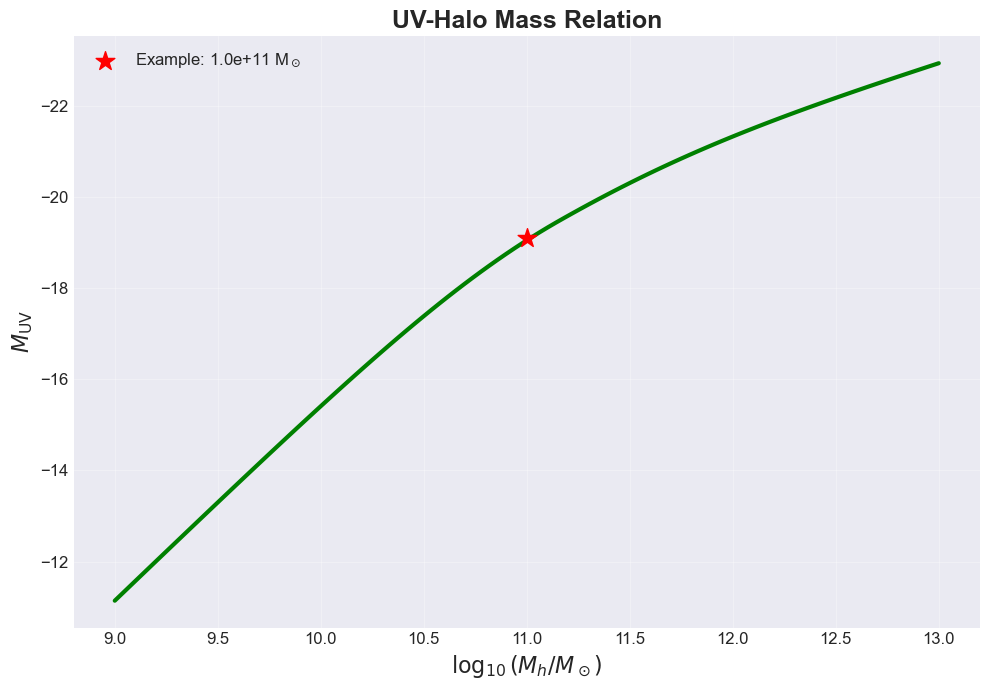

In [38]:
# Plot UVHMR for a range of halo masses
Mh_array = np.logspace(9, 13, 100)
MUV_array = model.MUV(Mh_array)

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(np.log10(Mh_array), MUV_array, 'g-', linewidth=3)
ax.scatter(np.log10(Mh_example), MUV_example, s=200, c='red', 
           marker='*', zorder=5, label=f'Example: {Mh_example:.1e} M$_\\odot$')

ax.set_xlabel('$\\log_{10}(M_h / M_\\odot)$', fontsize=16)
ax.set_ylabel('$M_{\\mathrm{UV}}$', fontsize=16)
ax.set_title('UV-Halo Mass Relation', fontsize=18, fontweight='bold')
ax.invert_yaxis()  # Brighter (more negative) on top
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

## Part 5: Halo Occupation Distribution

The HOD tells us how many galaxies (central and satellite) occupy halos of a given mass.

In [39]:
# Compute occupation numbers for M_UV < -18
MUV_thresh = -18
Mh_range = np.logspace(10, 15, 100)

N_cen = model.Ncen(Mh_range, MUV_thresh)
N_sat = model.Nsat(Mh_range, MUV_thresh)
N_tot = model.Ngal(Mh_range, MUV_thresh)

print(f"Occupation statistics for M_UV < {MUV_thresh}:")
print(f"  Peak central occupation: {N_cen.max():.3f}")
print(f"  Max satellite number: {N_sat.max():.2f}")
print(f"  Halo mass at peak satellites: {Mh_range[np.argmax(N_sat)]:.2e} M_sun")

Occupation statistics for M_UV < -18:
  Peak central occupation: 1.000
  Max satellite number: 316.22
  Halo mass at peak satellites: 1.00e+15 M_sun


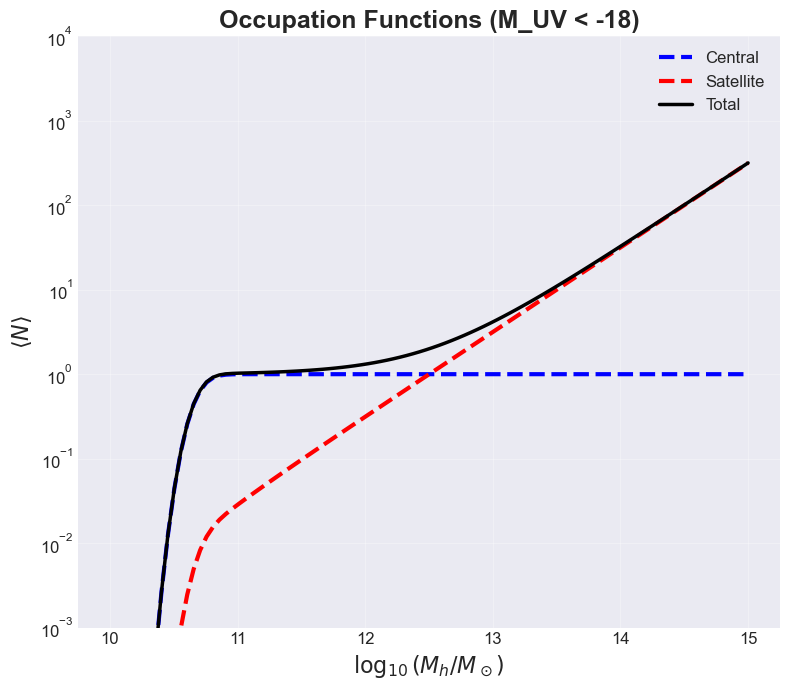

In [40]:
# Plot occupation functions
fig, ax = plt.subplots(figsize=(8, 7))

ax.plot(np.log10(Mh_range), N_cen, 'b--', linewidth=3, label='Central')
ax.plot(np.log10(Mh_range), N_sat, 'r--', linewidth=3, label='Satellite')
ax.plot(np.log10(Mh_range), N_tot, 'k-', linewidth=2.5, label='Total')


ax.set_yscale('log')
ax.set_ylim(0.001,10000)
ax.set_xlabel('$\\log_{10}(M_h / M_\\odot)$', fontsize=16)
ax.set_ylabel('$\\langle N \\rangle$', fontsize=16)
ax.set_title(f'Occupation Functions (M_UV < {MUV_thresh})', 
             fontsize=18, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

## Part 6: Mean Properties

Compute averaged properties for galaxies above a brightness threshold.

In [41]:
# Compute mean properties for different thresholds
thresholds = [-21, -20, -19, -18, -17]

print("Mean Properties by Brightness Threshold:")
print("="*60)

for thresh in thresholds:
    mean_mass = model.mean_halo_mass(thresh)
    mean_b = model.mean_bias(thresh)
    
    print(f"\nM_UV < {thresh}:")
    print(f"  Mean halo mass: {10**mean_mass:.2e} M_sun (log = {mean_mass:.2f})")
    print(f"  Mean bias: {mean_b:.2f}")

Mean Properties by Brightness Threshold:

M_UV < -21:
  Mean halo mass: 7.84e+11 M_sun (log = 11.89)
  Mean bias: 8.66

M_UV < -20:
  Mean halo mass: 3.45e+11 M_sun (log = 11.54)
  Mean bias: 6.78

M_UV < -19:
  Mean halo mass: 1.71e+11 M_sun (log = 11.23)
  Mean bias: 5.57

M_UV < -18:
  Mean halo mass: 9.48e+10 M_sun (log = 10.98)
  Mean bias: 4.76

M_UV < -17:
  Mean halo mass: 5.62e+10 M_sun (log = 10.75)
  Mean bias: 4.17


## Part 7: Parameter Exploration

See how changing parameters affects the luminosity function.

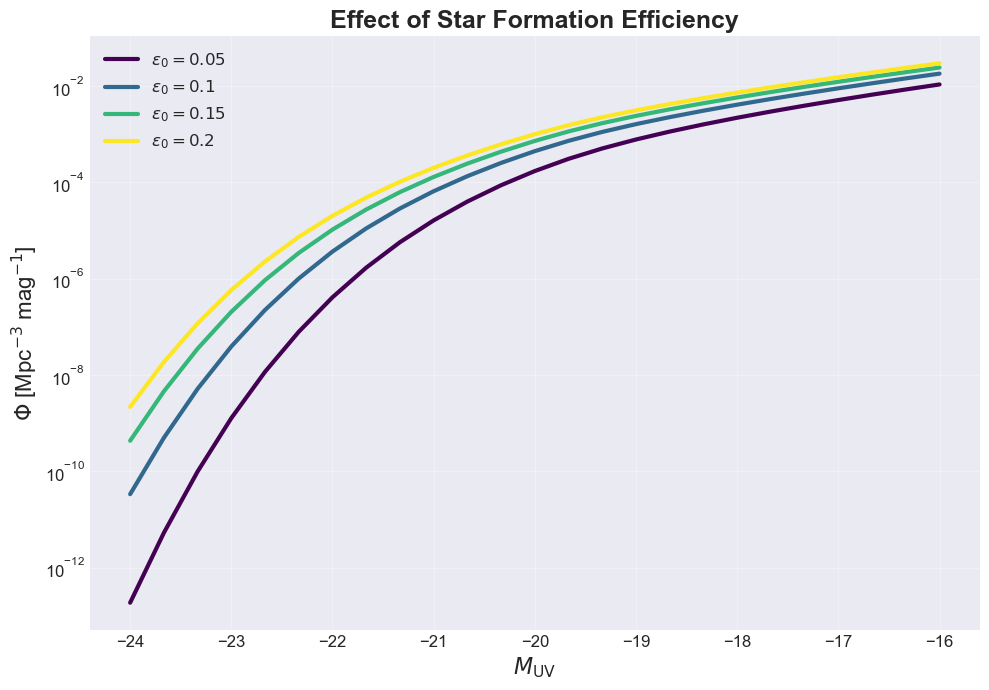

Higher eps0 → more efficient star formation → more bright galaxies


In [42]:
# Explore effect of star formation efficiency
eps0_values = [0.05, 0.1, 0.15, 0.2]
colors = plt.cm.viridis(np.linspace(0, 1, len(eps0_values)))

fig, ax = plt.subplots(figsize=(10, 7))

for eps0, color in zip(eps0_values, colors):
    model_var = HODModel(
        z=6.0, eps0=eps0, Mc=10**11.5, a=0.6, b=0.35,
        sigma_UV=0.35, Mcut=10**10, Msat=10**12.5, asat=1.0
    )
    phi_var = model_var.luminosity_function(MUV)
    ax.semilogy(MUV, phi_var, linewidth=3, color=color,
                label=f'$\\epsilon_0={eps0}$')

ax.set_xlabel('$M_{\\mathrm{UV}}$', fontsize=16)
ax.set_ylabel('$\\Phi$ [Mpc$^{-3}$ mag$^{-1}$]', fontsize=16)
ax.set_title('Effect of Star Formation Efficiency', fontsize=18, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

print("Higher eps0 → more efficient star formation → more bright galaxies")

## Part 8: Redshift Evolution

Study how the luminosity function evolves with redshift.

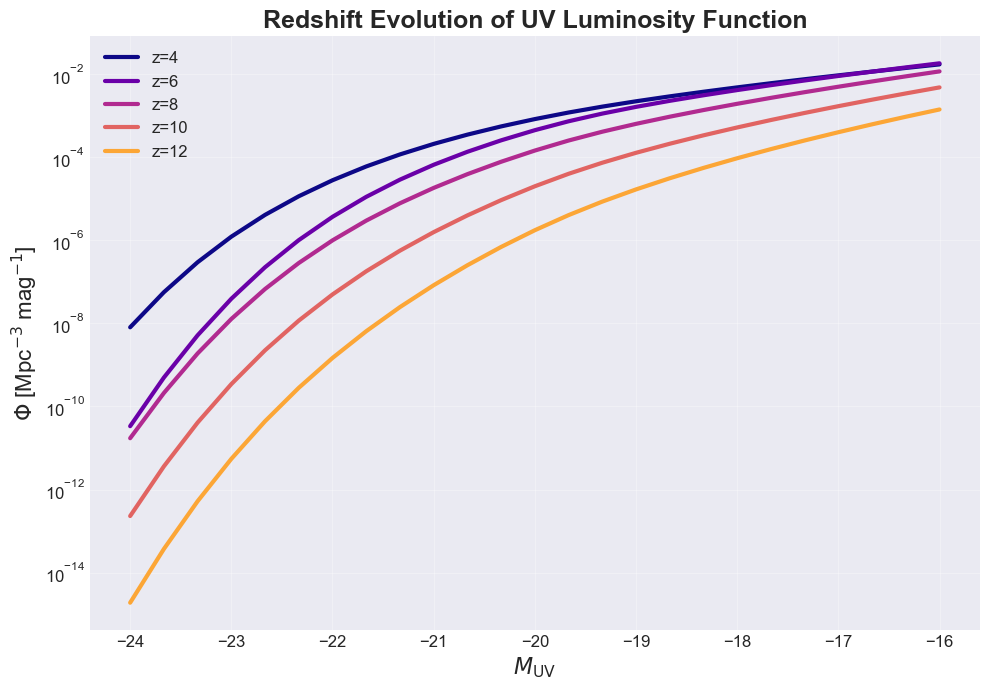


✓ Model reset to z=6.0


In [43]:
# Multi-redshift analysis
redshifts = [4, 6, 8, 10, 12]
colors = plt.cm.plasma(np.linspace(0, 0.8, len(redshifts)))

fig, ax = plt.subplots(figsize=(10, 7))

# Reuse the same model, updating redshift
for z_val, color in zip(redshifts, colors):
    model.update_parameters(z=z_val)
    phi_z = model.luminosity_function(MUV)
    ax.semilogy(MUV, phi_z, linewidth=3, color=color, label=f'z={z_val}')

ax.set_xlabel('$M_{\\mathrm{UV}}$', fontsize=16)
ax.set_ylabel('$\\Phi$ [Mpc$^{-3}$ mag$^{-1}$]', fontsize=16)
ax.set_title('Redshift Evolution of UV Luminosity Function', 
             fontsize=18, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Reset to original redshift
model.update_parameters(z=6.0)
print(f"\n✓ Model reset to z={model.z}")

## Part 9: Comprehensive Summary Plot

Create a figure showing all key results together.

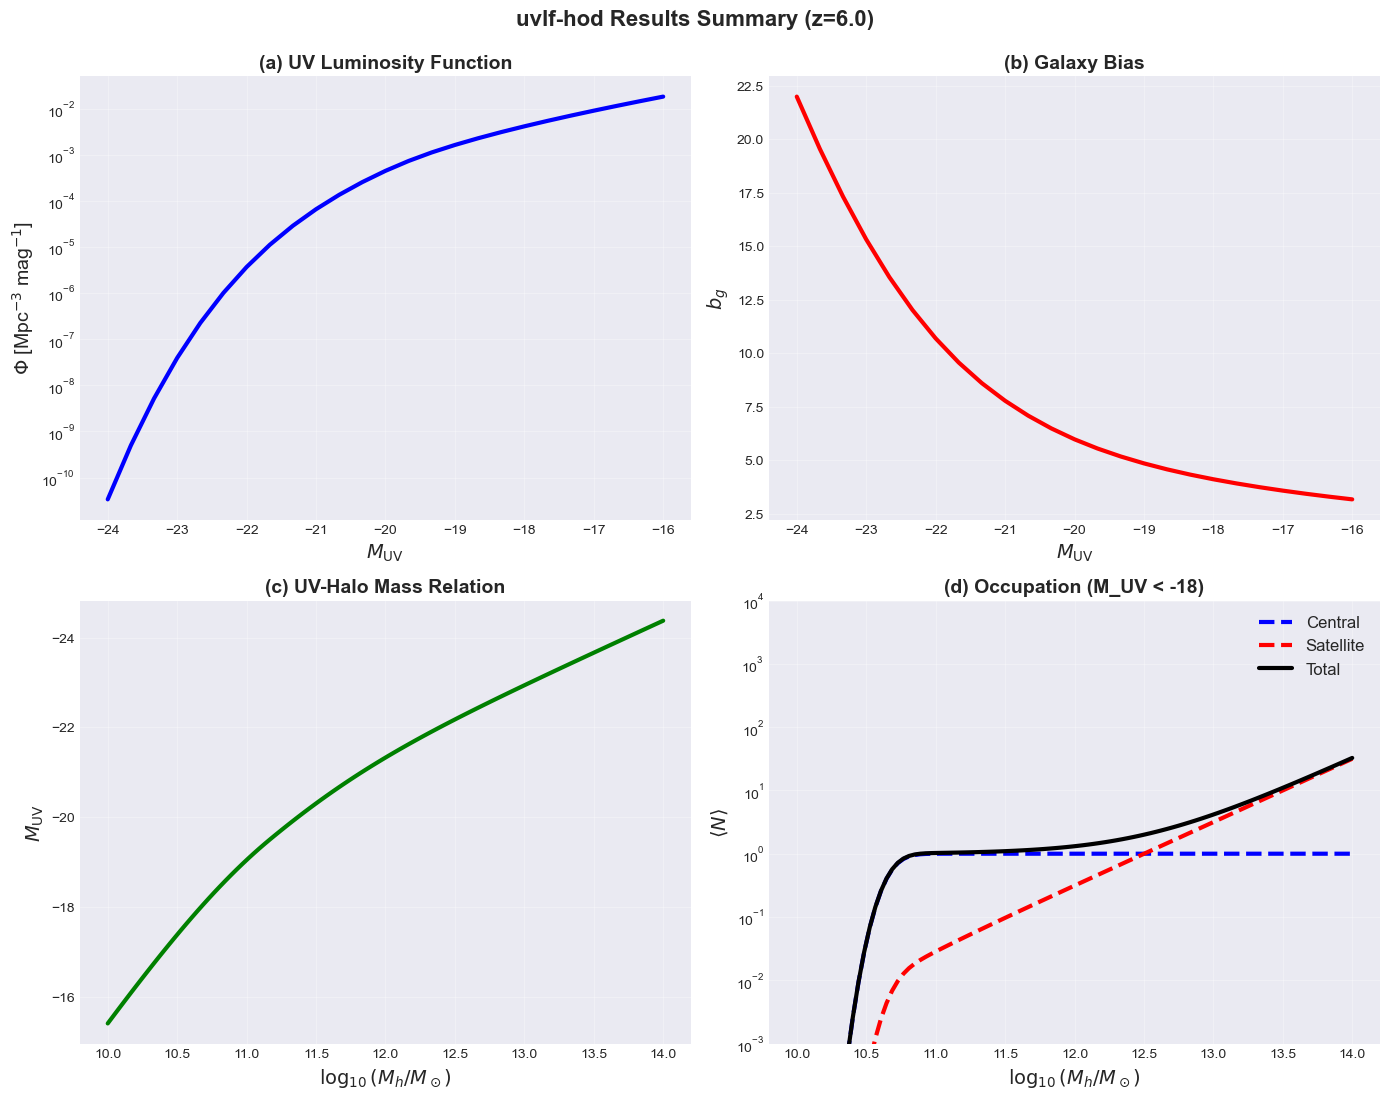

In [49]:
# Recompute everything with original parameters
model = HODModel(
    z=6.0, eps0=0.1, Mc=10**11.5, a=0.6, b=0.35,
    sigma_UV=0.35, Mcut=10**10, Msat=10**12.5, asat=1.0
)

MUV = np.linspace(-24, -16, 25)
phi = model.luminosity_function(MUV)
bias = model.galaxy_bias(MUV)

Mh_array = np.logspace(10, 14, 100)
MUV_hmr = model.MUV(Mh_array)
N_cen = model.Ncen(Mh_array, -18)
N_sat = model.Nsat(Mh_array, -18)

# Create 2x2 subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 11))

# Luminosity Function
ax1.semilogy(MUV, phi, 'b-', linewidth=3)
ax1.set_xlabel('$M_{\\mathrm{UV}}$', fontsize=14)
ax1.set_ylabel('$\\Phi$ [Mpc$^{-3}$ mag$^{-1}$]', fontsize=14)
ax1.set_title('(a) UV Luminosity Function', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Galaxy Bias
ax2.plot(MUV, bias, 'r-', linewidth=3)
ax2.set_xlabel('$M_{\\mathrm{UV}}$', fontsize=14)
ax2.set_ylabel('$b_g$', fontsize=14)
ax2.set_title('(b) Galaxy Bias', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# UVHMR
ax3.plot(np.log10(Mh_array), MUV_hmr, 'g-', linewidth=3)
ax3.set_xlabel('$\\log_{10}(M_h / M_\\odot)$', fontsize=14)
ax3.set_ylabel('$M_{\\mathrm{UV}}$', fontsize=14)
ax3.invert_yaxis()
ax3.set_title('(c) UV-Halo Mass Relation', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Occupation
ax4.plot(np.log10(Mh_array), N_cen, 'b--', linewidth=3, label='Central')
ax4.plot(np.log10(Mh_array), N_sat, 'r--', linewidth=3, label='Satellite')
ax4.plot(np.log10(Mh_array), N_sat+N_cen, 'k-', linewidth=3, label='Total')
ax4.set_xlabel('$\\log_{10}(M_h / M_\\odot)$', fontsize=14)
ax4.set_ylabel('$\\langle N \\rangle$', fontsize=14)
ax4.set_title('(d) Occupation (M_UV < -18)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=12)
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')
ax4.set_ylim(0.001,10000)

plt.suptitle(f'uvlf-hod Results Summary (z={model.z})', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [50]:
# Final model state
print("\n" + "="*70)
print("Tutorial Complete!")
print("="*70)
print("\nFinal model configuration:")
print(model)
print("\n" + "="*70)


Tutorial Complete!

Final model configuration:
HOD Model at z=6.0
UVHMR Parameters:
  eps0 = 0.100
  Mc = 3.16e+11 M_sun
  a = 0.60
  b = 0.35

HOD Parameters:
  sigma_UV = 0.35 mag
  Mcut = 1.00e+10 M_sun
  Msat = 3.16e+12 M_sun
  asat = 1.00

Settings:
  add_dust = True

